In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error

In [2]:
# Load the stock market data
data = pd.read_csv('/content/NFLX.csv')

In [3]:
# Convert the 'Date' column to datetime and set it as the index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

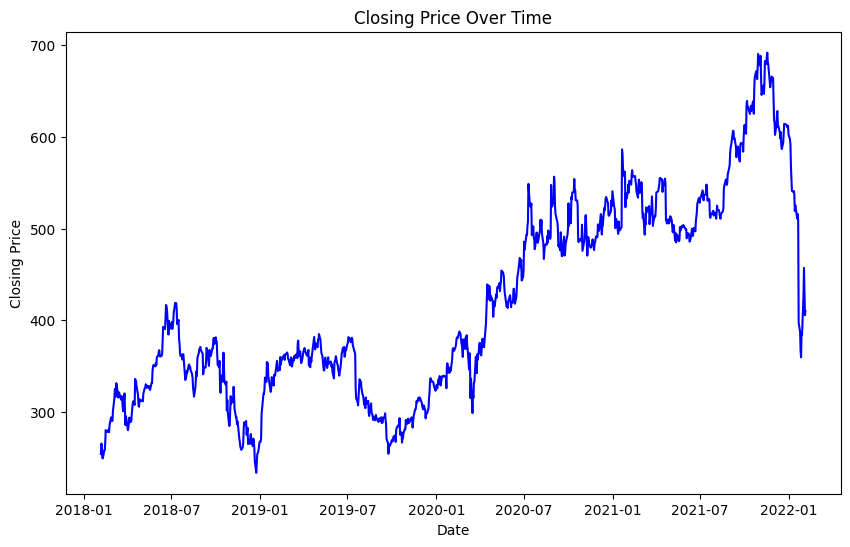

ADF Statistic: -1.8125906878289955
p-value: 0.3742289256820759
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


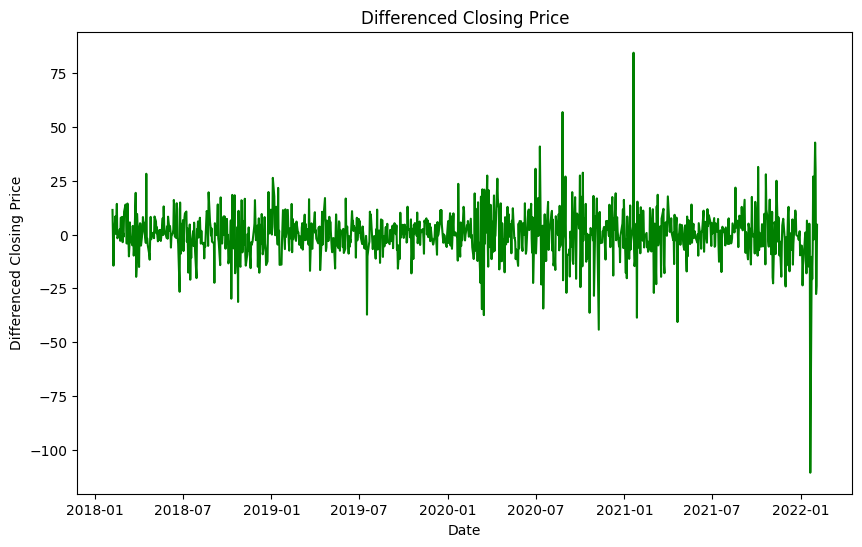

In [4]:
# Check for missing values and fill them if necessary
if data.isnull().values.any():
    data.fillna(method='ffill', inplace=True)

# Plot the closing price over time
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], color='blue')
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

# Check for stationarity using the Augmented Dickey-Fuller test
def adf_test(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

adf_test(data['Close'])

# Perform differencing to make the time series stationary
data_diff = data['Close'].diff().dropna()

# Plot the differenced series
plt.figure(figsize=(10, 6))
plt.plot(data_diff.index, data_diff, color='green')
plt.title('Differenced Closing Price')
plt.xlabel('Date')
plt.ylabel('Differenced Closing Price')
plt.show()

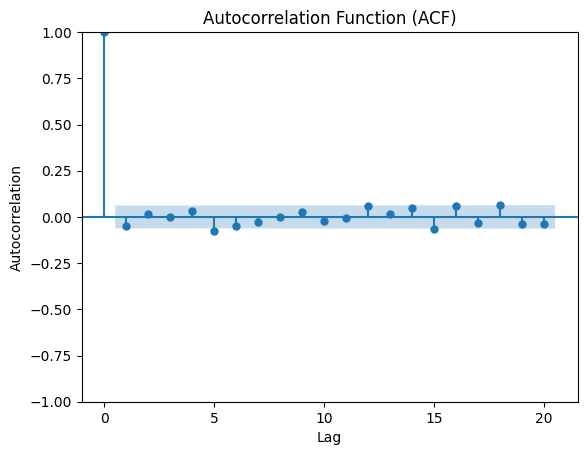

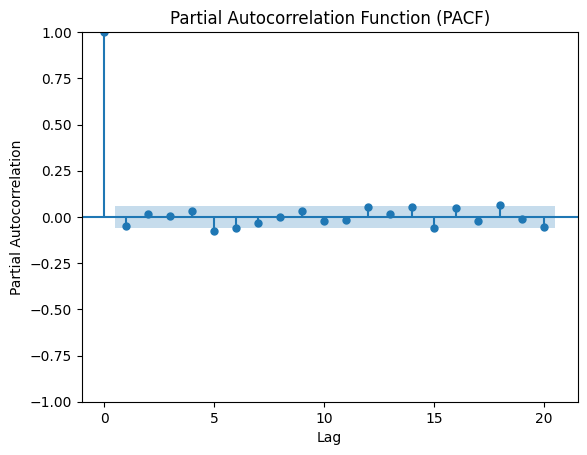

In [5]:
# Plot ACF and PACF to determine ARIMA parameters
plot_acf(data_diff, lags=20)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

plot_pacf(data_diff, lags=20)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

In [7]:
# Split data into training and testing sets
train_size = int(len(data) * 0.8)
train, test = data['Close'][:train_size], data['Close'][train_size:]

# Fit ARIMA model
order = (2, 1, 1)  # Example ARIMA order, you may need to adjust
model = ARIMA(train, order=order)
model_fit = model.fit()



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


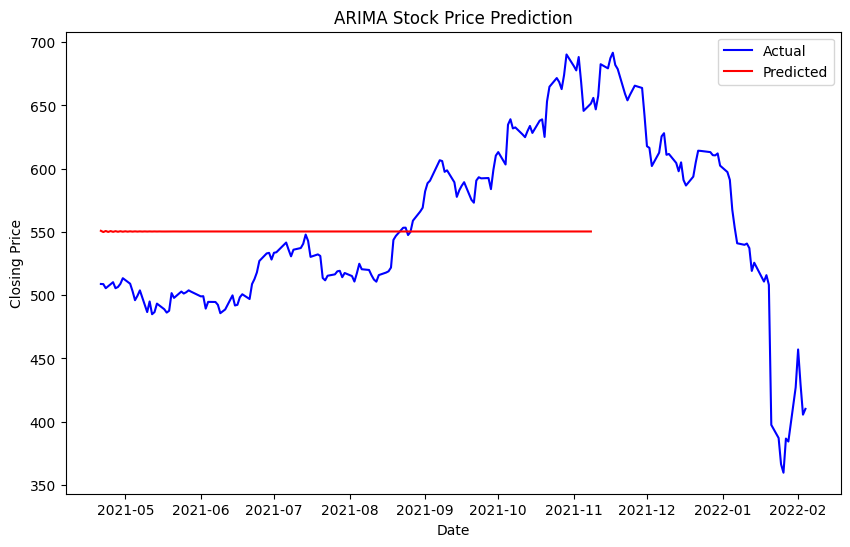

In [10]:
# Make predictions
predictions = model_fit.forecast(steps=len(test))

# Create index for predictions
prediction_index = pd.date_range(start=test.index[0], periods=len(test))

# Plot predictions against actual values
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, color='blue', label='Actual')
plt.plot(prediction_index, predictions, color='red', label='Predicted')
plt.title('ARIMA Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()
